In [170]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [171]:
g = nx.Graph()
g


In [172]:
distances = pd.read_csv("asp.csv")
distances

,X,Amsterdam,Berlin,Copenhagen,London,Moscow,Rome,Warsaw
0,Amsterdam,0,365,381,220,1325,808,673
1,Berlin,365,0,225,575,995,730,320
2,Copenhagen,381,225,0,590,970,948,415
3,London,220,575,590,0,1540,890,890
4,Moscow,1325,995,970,1540,0,1462,710
5,Rome,808,730,948,890,1462,0,810
6,Warsaw,673,320,415,890,710,810,0


In [173]:
cities = []
for col in distances:
    if col != "X":
        g.add_node(col)
        cities.append(col)
        city_int = 0
        for i in col:
            city_int += ord(i)

In [180]:
dict_labels = dict()
for row in distances.iterrows():
    for city in cities:
        if row[1][city] != 0:
            g.add_edge(row[1]["X"], city, length=row[1][city])
            dict_labels[(row[1]["X"], city)] = row[1][city]
dict_labels

{('Amsterdam', 'Berlin'): 365,
 ('Amsterdam', 'Copenhagen'): 381,
 ('Amsterdam', 'London'): 220,
 ('Amsterdam', 'Moscow'): 1325,
 ('Amsterdam', 'Rome'): 808,
 ('Amsterdam', 'Warsaw'): 673,
 ('Berlin', 'Amsterdam'): 365,
 ('Berlin', 'Copenhagen'): 225,
 ('Berlin', 'London'): 575,
 ('Berlin', 'Moscow'): 995,
 ('Berlin', 'Rome'): 730,
 ('Berlin', 'Warsaw'): 320,
 ('Copenhagen', 'Amsterdam'): 381,
 ('Copenhagen', 'Berlin'): 225,
 ('Copenhagen', 'London'): 590,
 ('Copenhagen', 'Moscow'): 970,
 ('Copenhagen', 'Rome'): 948,
 ('Copenhagen', 'Warsaw'): 415,
 ('London', 'Amsterdam'): 220,
 ('London', 'Berlin'): 575,
 ('London', 'Copenhagen'): 590,
 ('London', 'Moscow'): 1540,
 ('London', 'Rome'): 890,
 ('London', 'Warsaw'): 890,
 ('Moscow', 'Amsterdam'): 1325,
 ('Moscow', 'Berlin'): 995,
 ('Moscow', 'Copenhagen'): 970,
 ('Moscow', 'London'): 1540,
 ('Moscow', 'Rome'): 1462,
 ('Moscow', 'Warsaw'): 710,
 ('Rome', 'Amsterdam'): 808,
 ('Rome', 'Berlin'): 730,
 ('Rome', 'Copenhagen'): 948,
 ('Rome', 

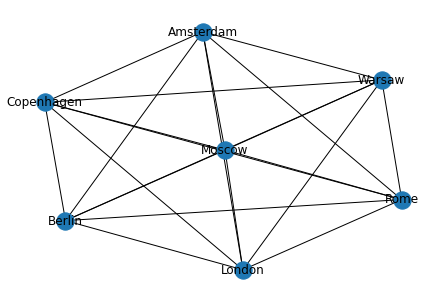

In [175]:
nx.draw(g, with_labels=True)
plt.show()

In [183]:
n = len(distances["X"])
all_shortest_path = dict(dict())
distance_dicts = dict()
for k in range(0, n):
    for i in range(0, n):
        for j in range(0, n):
            if i == j: continue
            print("from", cities[i])
            print("to", cities[j], distances[cities[i]][j], end="|")
            print(f"to {cities[j]}, via {cities[i]}-{cities[k]}({distances[cities[i]][k]}) and {cities[k]}-{cities[j]}({distances[cities[k]][j]}), {distances[cities[i]][k]+distances[cities[k]][j]}")
            distance_dicts[(cities[i], cities[j])] = min(distances[cities[i]][j], distances[cities[i]][k]+distances[cities[k]][j])
        print()

from Amsterdam
to Berlin 365|to Berlin, via Amsterdam-Amsterdam(0) and Amsterdam-Berlin(365), 365
from Amsterdam
to Copenhagen 381|to Copenhagen, via Amsterdam-Amsterdam(0) and Amsterdam-Copenhagen(381), 381
from Amsterdam
to London 220|to London, via Amsterdam-Amsterdam(0) and Amsterdam-London(220), 220
from Amsterdam
to Moscow 1325|to Moscow, via Amsterdam-Amsterdam(0) and Amsterdam-Moscow(1325), 1325
from Amsterdam
to Rome 808|to Rome, via Amsterdam-Amsterdam(0) and Amsterdam-Rome(808), 808
from Amsterdam
to Warsaw 673|to Warsaw, via Amsterdam-Amsterdam(0) and Amsterdam-Warsaw(673), 673

from Berlin
to Amsterdam 365|to Amsterdam, via Berlin-Amsterdam(365) and Amsterdam-Amsterdam(0), 365
from Berlin
to Copenhagen 225|to Copenhagen, via Berlin-Amsterdam(365) and Amsterdam-Copenhagen(381), 746
from Berlin
to London 575|to London, via Berlin-Amsterdam(365) and Amsterdam-London(220), 585
from Berlin
to Moscow 995|to Moscow, via Berlin-Amsterdam(365) and Amsterdam-Moscow(1325), 1690
from 

{('Amsterdam', 'Berlin'): 365,
 ('Amsterdam', 'Copenhagen'): 381,
 ('Amsterdam', 'London'): 220,
 ('Amsterdam', 'Moscow'): 1325,
 ('Amsterdam', 'Rome'): 808,
 ('Amsterdam', 'Warsaw'): 673,
 ('Berlin', 'Amsterdam'): 365,
 ('Berlin', 'Copenhagen'): 225,
 ('Berlin', 'London'): 575,
 ('Berlin', 'Moscow'): 995,
 ('Berlin', 'Rome'): 730,
 ('Berlin', 'Warsaw'): 320,
 ('Copenhagen', 'Amsterdam'): 381,
 ('Copenhagen', 'Berlin'): 225,
 ('Copenhagen', 'London'): 590,
 ('Copenhagen', 'Moscow'): 970,
 ('Copenhagen', 'Rome'): 948,
 ('Copenhagen', 'Warsaw'): 415,
 ('London', 'Amsterdam'): 220,
 ('London', 'Berlin'): 575,
 ('London', 'Copenhagen'): 590,
 ('London', 'Moscow'): 1540,
 ('London', 'Rome'): 890,
 ('London', 'Warsaw'): 890,
 ('Moscow', 'Amsterdam'): 1325,
 ('Moscow', 'Berlin'): 995,
 ('Moscow', 'Copenhagen'): 970,
 ('Moscow', 'London'): 1540,
 ('Moscow', 'Rome'): 1462,
 ('Moscow', 'Warsaw'): 710,
 ('Rome', 'Amsterdam'): 808,
 ('Rome', 'Berlin'): 730,
 ('Rome', 'Copenhagen'): 948,
 ('Rome', 